In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bolobo cd
saint-philippe re
punta arenas cl
los llanos de aridane es
cururupu br
riyadh sa
port hedland au
albany au
taolanaro mg
los banos us
iqaluit ca
albany au
rikitea pf
hobart au
ushuaia ar
puerto ayora ec
port alfred za
cape town za
starokozache ua
carnarvon au
bandarbeyla so
aldan ru
atuona pf
atuona pf
broome au
olinda br
saldanha za
hermanus za
mataura pf
busselton au
popondetta pg
flinders au
punta arenas cl
bjornevatn no
chokurdakh ru
yakeshi cn
avarua ck
itoman jp
taoudenni ml
acapulco mx
mrirt ma
hobart au
dudinka ru
sitka us
ushuaia ar
katobu id
albany au
kaeo nz
port keats au
chuy uy
thompson ca
nikolskoye ru
hithadhoo mv
nemuro jp
pisco pe
tallahassee us
avarua ck
raudeberg no
torbay ca
port alfred za
hofn is
atuona pf
codrington ag
vanavara ru
puerto ayora ec
marcona pe
albany au
kaitangata nz
mar del plata ar
punta arenas cl
hilo us
udachnyy ru
vaini to
tilichiki ru
kinanah sd
jamestown sh
ginatilan ph
faanui pf
mataura pf
chany ru
rikitea pf
mar del plata ar
rikitea

codrington ag
codrington ag
surt ly
east london za
tonneins fr
new norfolk au
vaini to
port augusta au
pilao arcado br
onega ru
barbar sd
bandarbeyla so
muisne ec
poya nc
makakilo city us
vaini to
saint-philippe re
new norfolk au
lorengau pg
alice springs au
yellowknife ca
vestmannaeyjar is
mehamn no
tiznit ma
puerto padre cu
vostok ru
barrow us
cape town za
rikitea pf
laksham bd
hobart au
hermanus za
arona es
victoria sc
lata sb
ribeira grande pt
chilmari bd
jiuquan cn
jalu ly
barrow us
qaanaaq gl
busselton au
ushuaia ar
hobart au
victoria sc
desaguadero pe
bluff nz
busselton au
laguna br
saint-pierre pm
kadykchan ru
pavlodar kz
slupsk pl
tiksi ru
camabatela ao
mataura pf
kodiak us
bredasdorp za
barrow us
belushya guba ru
kapaa us
hermanus za
barrow us
samalaeulu ws
arraial do cabo br
los llanos de aridane es
rikitea pf
lorengau pg
kodiak us
ushuaia ar
vao nc
taoudenni ml
hilo us
iqaluit ca
warqla dz
severo-kurilsk ru
ushuaia ar
skelleftea se
bluff nz
sitka us
bengkulu id
provideniya 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc817d961e6353eef67b0eaf62922dc5


In [9]:
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Processing Record 1 of Set 1 | bolobo
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | cururupu
Processing Record 6 of Set 1 | riyadh
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
Processing Record 10 of Set 1 | los banos
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | starokozache
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | bandarbeyla
Processing Record 21 of Set 1 | aldan
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | broome
Processing 

Processing Record 42 of Set 4 | saint pete beach
City not found. Skipping...
Processing Record 43 of Set 4 | illoqqortoormiut
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | odienne
Processing Record 47 of Set 4 | ngunguru
City not found. Skipping...
Processing Record 48 of Set 4 | saleaula
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | ponta delgada
Processing Record 1 of Set 5 | tadine
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | santa cruz verapaz
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | sabang
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | asau
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | bouar
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | trinidad
Processing Record 12 of Set 5 | necochea
Processing Record 13 of Set 5 | bagdarin
City not found. Skipping...
Processi

Processing Record 29 of Set 8 | luderitz
City not found. Skipping...
Processing Record 30 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 8 | yuzhno-yeniseyskiy
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | toamasina
City not found. Skipping...
Processing Record 35 of Set 8 | tiruvottiyur
Processing Record 36 of Set 8 | ostersund
Processing Record 37 of Set 8 | marsa matruh
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | macas
Processing Record 41 of Set 8 | karlstad
Processing Record 42 of Set 8 | ust-ilimsk
Processing Record 43 of Set 8 | waterloo
City not found. Skipping...
Processing Record 44 of Set 8 | lolua
City not found. Skipping...
Processing Record 45 of Set 8 | shchelyayur
Processing Record 46 of Set 8 | paola
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | iacu
Processing Rec

Processing Record 14 of Set 12 | atar
Processing Record 15 of Set 12 | moose factory
Processing Record 16 of Set 12 | usinsk
City not found. Skipping...
Processing Record 17 of Set 12 | jiddah
Processing Record 18 of Set 12 | taber
Processing Record 19 of Set 12 | maple creek
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | lewistown
Processing Record 22 of Set 12 | praia
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | suicheng
Processing Record 25 of Set 12 | avera
Processing Record 26 of Set 12 | nsanje
Processing Record 27 of Set 12 | dispur
Processing Record 28 of Set 12 | naantali
Processing Record 29 of Set 12 | sarakhs
Processing Record 30 of Set 12 | verkhnevilyuysk
Processing Record 31 of Set 12 | soyo
Processing Record 32 of Set 12 | miguel hidalgo
Processing Record 33 of Set 12 | ovalle
Processing Record 34 of Set 12 | saint anthony
Processing Record 35 of Set 12 | tarauaca
Processing Record 36 of Set 12 | dwarka
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bolobo,-2.1667,16.2333,72.25,88,100,3.36,CD,2022-02-25 01:51:41
1,Saint-Philippe,-21.3585,55.7679,74.79,86,100,6.46,RE,2022-02-25 01:51:41
2,Punta Arenas,-53.1500,-70.9167,55.51,71,0,12.66,CL,2022-02-25 01:47:49
3,Los Llanos De Aridane,28.6585,-17.9182,60.55,77,20,18.41,ES,2022-02-25 01:51:42
4,Cururupu,-1.8283,-44.8683,74.93,97,64,3.44,BR,2022-02-25 01:51:42
5,Riyadh,24.6877,46.7219,60.94,20,72,10.42,SA,2022-02-25 01:50:01
6,Port Hedland,-20.3167,118.5667,96.85,52,43,4.61,AU,2022-02-25 01:47:33
7,Albany,42.6001,-73.9662,27.30,57,43,3.06,US,2022-02-25 01:50:40
8,Los Banos,14.1667,121.1833,83.80,59,17,13.49,PH,2022-02-25 01:51:43
9,Iqaluit,63.7506,-68.5145,-27.31,67,100,11.50,CA,2022-02-25 01:51:44


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
ordered_city_data_df = city_data_df[new_column_order]
ordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bolobo,CD,2022-02-25 01:51:41,-2.1667,16.2333,72.25,88,100,3.36
1,Saint-Philippe,RE,2022-02-25 01:51:41,-21.3585,55.7679,74.79,86,100,6.46
2,Punta Arenas,CL,2022-02-25 01:47:49,-53.1500,-70.9167,55.51,71,0,12.66
3,Los Llanos De Aridane,ES,2022-02-25 01:51:42,28.6585,-17.9182,60.55,77,20,18.41
4,Cururupu,BR,2022-02-25 01:51:42,-1.8283,-44.8683,74.93,97,64,3.44
5,Riyadh,SA,2022-02-25 01:50:01,24.6877,46.7219,60.94,20,72,10.42
6,Port Hedland,AU,2022-02-25 01:47:33,-20.3167,118.5667,96.85,52,43,4.61
7,Albany,US,2022-02-25 01:50:40,42.6001,-73.9662,27.30,57,43,3.06
8,Los Banos,PH,2022-02-25 01:51:43,14.1667,121.1833,83.80,59,17,13.49
9,Iqaluit,CA,2022-02-25 01:51:44,63.7506,-68.5145,-27.31,67,100,11.50


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

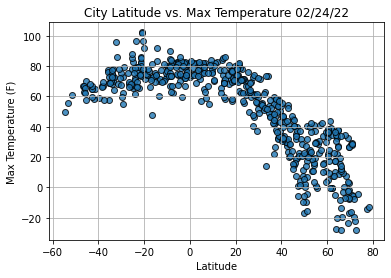

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

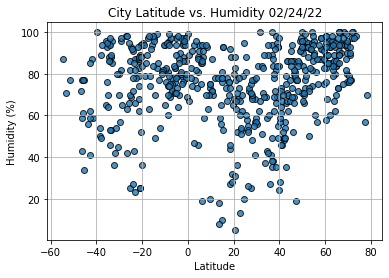

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

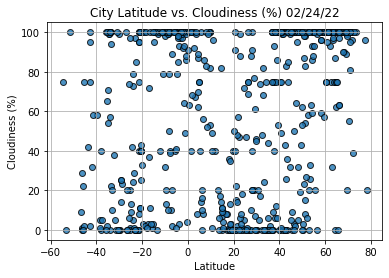

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

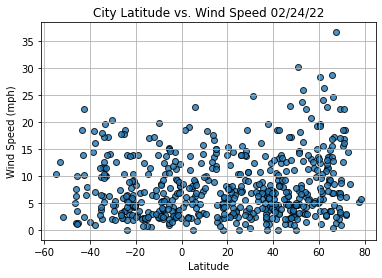

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    75.34
Humidity                       86
Cloudiness                     86
Wind Speed                   7.05
Country                        EC
Date          2022-02-25 01:51:45
Name: 13, dtype: object

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [33]:
city_data_df["Lat"] >=0

0      False
1      False
2      False
3       True
4      False
       ...  
549    False
550     True
551     True
552    False
553     True
Name: Lat, Length: 554, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Los Llanos De Aridane,28.6585,-17.9182,60.55,77,20,18.41,ES,2022-02-25 01:51:42
5,Riyadh,24.6877,46.7219,60.94,20,72,10.42,SA,2022-02-25 01:50:01
7,Albany,42.6001,-73.9662,27.30,57,43,3.06,US,2022-02-25 01:50:40
8,Los Banos,14.1667,121.1833,83.80,59,17,13.49,PH,2022-02-25 01:51:43
9,Iqaluit,63.7506,-68.5145,-27.31,67,100,11.50,CA,2022-02-25 01:51:44


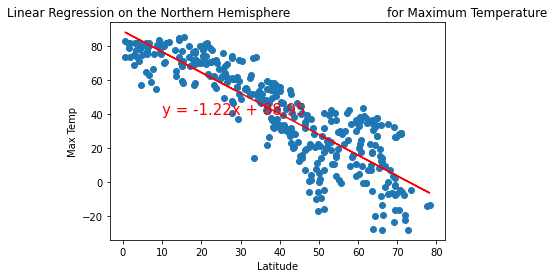

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

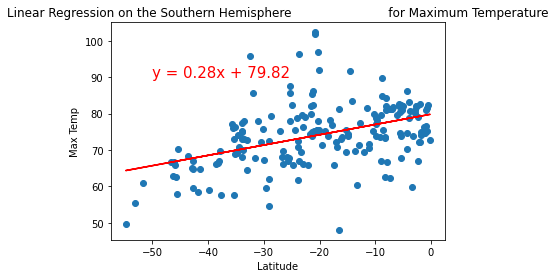

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

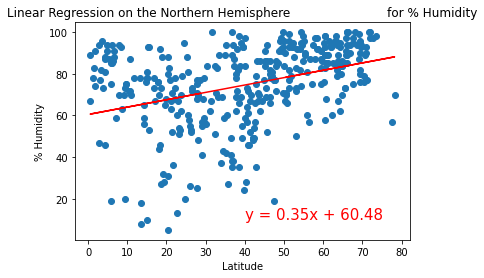

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

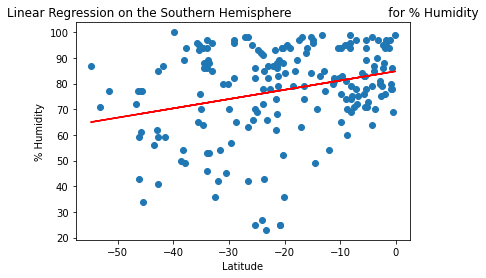

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

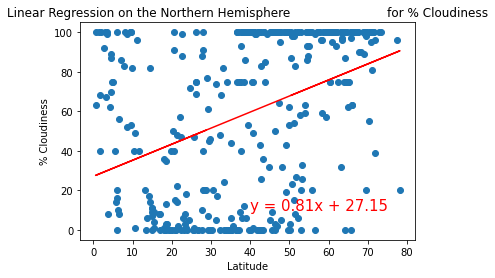

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

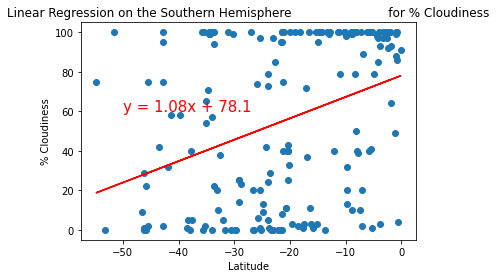

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

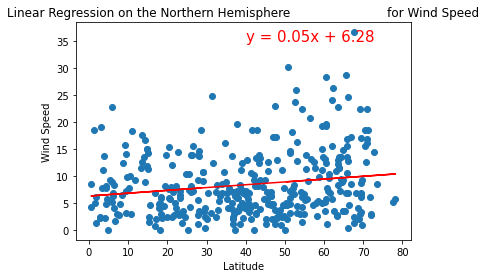

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

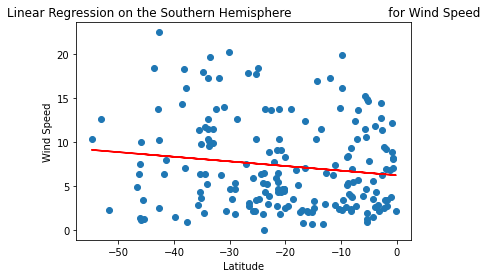

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [47]:
pip install gmaps

  Using cached gmaps-0.9.0.tar.gz (1.1 MB)
  Using cached geojson-2.5.0-py2.py3-none-any.whl (14 kB)

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=9d02518770c9655821216eaa2d92bcf1bbbc95f8ce16e1f621884e690ec4724a
  Stored in directory: c:\users\april vilmin\appdata\local\pip\cache\wheels\66\ab\29\3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
